<a href="https://colab.research.google.com/github/Mwaniki25/KNN_-_Naive_Bayes/blob/main/Spam_Mail_Classifiaction_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Classification Using Naive Bayes

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Classifying email data using Naive bayes

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [17]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Loading the Data from the source i.e. csv
# ---
names = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over',
        'word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail', 'word_freq_receive','word_freq_will',
        'word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email',
         'word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp',
         'word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857',
         'word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts',
         'word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
         'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[',
         'char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest',
         'capital_run_length_total','spam']

data  = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',names = names)




## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset
#
data.shape

(4601, 58)

In [5]:
# Previewing the top of our dataset
#
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
# Checking whether each column has an appropriate datatype
#
data.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

## 4. External Data Source Validation

### a.Validation

## 5. Tidying the Dataset

In [ ]:
# Checking for Outliers

#All the frequency data is between 0 and 100, all of the class data is 0 or 1 : so their is no outlier


In [9]:
# Identifying the Missing Data
#
data.isnull().any().any()

False

In [12]:
# More data cleaning procedures
#
data.duplicated().sum()

391

In [15]:
# Dropping duplicates
# 
data = data.drop_duplicates()

## 6. Exploratory Analysis

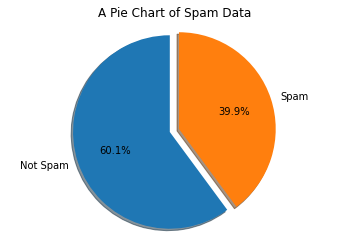

In [19]:
# Ploting the bivariate summaries and recording our observations
#
#Create a pie chart to indicate the amount of spam mails
column= data.spam.value_counts()


# accessing the data to plot

# labels
label= ['Not Spam', 'Spam']
# values
value = column.values

# plotting the pie chart
plt.pie(value, labels = label, autopct = '%1.1f%%', shadow = True, explode = (0.1,0), startangle = 90)
plt.axis('equal')
plt.title('A Pie Chart of Spam Data')
plt.show()

In [20]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
word_freq_make,4210.0,0.104366,0.300005,0.0,0.0000,0.000,0.00000,4.540
word_freq_address,4210.0,0.112656,0.454260,0.0,0.0000,0.000,0.00000,14.280
word_freq_all,4210.0,0.291473,0.515719,0.0,0.0000,0.000,0.44000,5.100
word_freq_3d,4210.0,0.063078,1.352487,0.0,0.0000,0.000,0.00000,42.810
word_freq_our,4210.0,0.325321,0.687805,0.0,0.0000,0.000,0.41000,10.000
word_freq_over,4210.0,0.096656,0.276030,0.0,0.0000,0.000,0.00000,5.880
word_freq_remove,4210.0,0.117475,0.397284,0.0,0.0000,0.000,0.00000,7.270
word_freq_internet,4210.0,0.108000,0.410282,0.0,0.0000,0.000,0.00000,11.110
word_freq_order,4210.0,0.091860,0.282144,0.0,0.0000,0.000,0.00000,5.260
word_freq_mail,4210.0,0.248420,0.656638,0.0,0.0000,0.000,0.19000,18.180


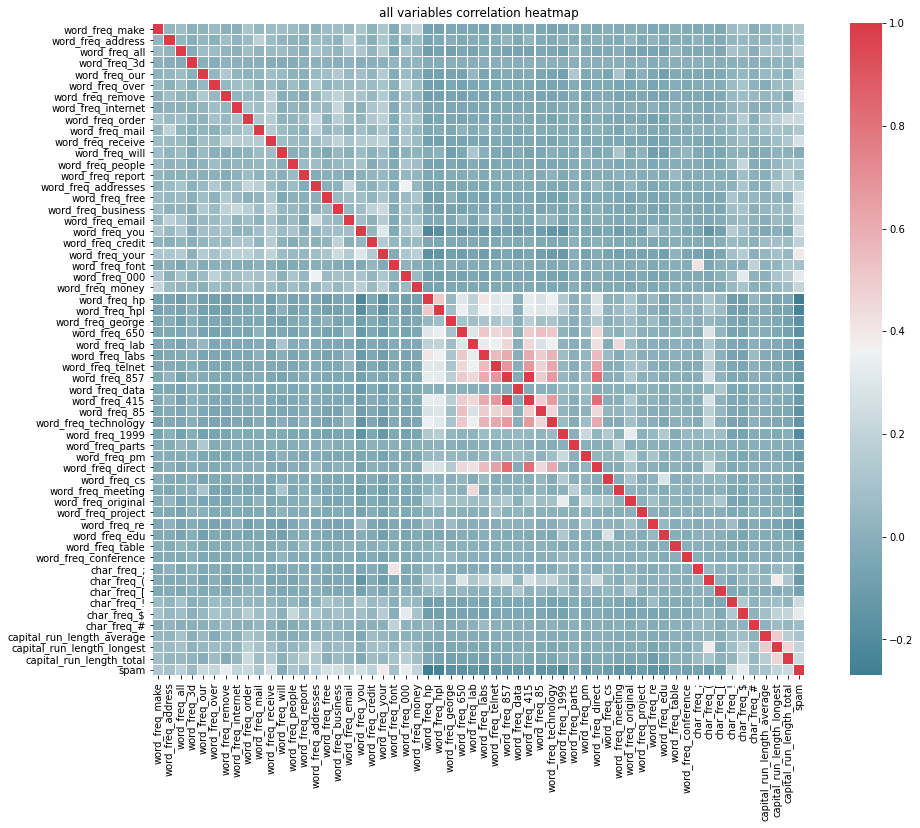

In [21]:
# Correlatin
corr=data.corr()
plt.figure(figsize=(16, 12))
ax=sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,
            linewidths=.1)
ax.set(title="all variables correlation heatmap");

## 7. Implementing the Solution

### Part 1 : 80-20 Split

In [23]:
# Implementing the Solution
# Using Gaussian Naiva bayes Classifier 


X = data.drop('spam',axis=1)
y = data['spam']

In [25]:
# 
from sklearn.model_selection import train_test_split
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [27]:
# Training our model
# 
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [30]:
# Predicting our test predictors
from sklearn.metrics import classification_report, confusion_matrix
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8111638954869359


In [31]:
print(confusion_matrix(y_test, predicted))

[[368 147]
 [ 12 315]]


### Part 2 : 70-30 Split

In [32]:

# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [33]:
# Training our model
# 

clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [34]:
# Predicting our test predictors

predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8147268408551069


In [35]:
print(confusion_matrix(y_test, predicted))

[[547 211]
 [ 23 482]]


### Part 3 : 60-40 Split

In [36]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6)

In [37]:
# Training our model
# 

clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [38]:
# Predicting our test predictors

predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8147268408551069


In [39]:
print(confusion_matrix(y_test, predicted))

[[728 275]
 [ 37 644]]


## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [42]:
# Reviewing the Solution 
#
# Load libraries
from sklearn.preprocessing import Normalizer

# Create normalizer
normalizer = Normalizer(norm='l2')

# Transform feature matrix
normalizer.transform(X)

array([[0.00000000e+00, 2.24834975e-03, 2.24834975e-03, ...,
        1.31950026e-02, 2.14295835e-01, 9.76626921e-01],
       [2.03297105e-04, 2.71062806e-04, 4.84040726e-04, ...,
        4.95076854e-03, 9.77762266e-02, 9.95187732e-01],
       [2.59683978e-05, 0.00000000e+00, 3.07292708e-04, ...,
        4.25059392e-03, 2.09911216e-01, 9.77710178e-01],
       ...,
       [2.53812946e-03, 0.00000000e+00, 2.53812946e-03, ...,
        1.18784459e-02, 5.07625892e-02, 9.98330921e-01],
       [1.22759766e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.46672345e-02, 6.39373781e-02, 9.97423098e-01],
       [0.00000000e+00, 0.00000000e+00, 1.59858723e-02, ...,
        3.07420620e-02, 1.22968248e-01, 9.83745986e-01]])

In [43]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [44]:
# Training our model
# 

clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [45]:
# Predicting our test predictors

predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8111638954869359


In [46]:
print(confusion_matrix(y_test, predicted))


[[368 147]
 [ 12 315]]


## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?